In [1]:
import tsplib95
import mlrose
import numpy as np
import matplotlib.pyplot as plt

D:\AllEnvironments\venv_optimization\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [4]:
# Reading the tsp file 
cities_tsp_qa = tsplib95.load("C:/Users/Abhinav Sharma/Desktop/qa194.tsp")

#Save as a dictionary
city_data_tsp_qa = cities_tsp_qa.as_name_dict()

# City coordinates (Latitute and Longitute) saved as a list of lists 
city_coordinates_qa= [city_data_tsp_qa['node_coords'][k] for k in city_data_tsp_qa['node_coords']]

# city_coordinates

# Creating an Object that is the initialization of the fitness function using coordinates (Latitute/Longitude)
fit_city_coords_qa = mlrose.TravellingSales(coords = city_coordinates_qa)

# Optimization object defined 
optimization_object_qa = mlrose.TSPOpt(length = len(city_coordinates_qa), fitness_fn =fit_city_coords_qa, maximize=False)

### Two types of cooling chosen for simmulated annealing - Exponential Decay and Arithmatic Decay
### and then the 'Simulated Annealing' algorithm run for both the cooling schedules chosen 

In [5]:
# Initializing parameters 
t0_list = [5, 50, 500] # Initial temperature
min_list = [0.5,5,50] # Minimum temperature 
d_list = [0.005,0.05,0.5] #Decay List


best_state_exp_list =[]
best_fitness_exp_list = []
fitness_curve_exp_list =[]

best_state_arithmatic_list =[]
best_fitness_arithmatic_list = []
fitness_curve_arithmatic_list = []

In [6]:
# Creating a cooling schedule (EXPONENTIAL DECAY) for simulated annealing with initial parameters 
for t in t0_list:
    for m in min_list:
        # Initial temp should be greater than Minimum temp
        
        if t < m:
            continue
        for d in d_list:
            
            cooling_schedule_exp = mlrose.ExpDecay(init_temp=t, exp_const=d, min_temp=m)
                
            best_state_exp, best_fitness_exp, fitness_curve_exp = mlrose.simulated_annealing(problem=optimization_object_qa, 
                                                                                 schedule=cooling_schedule_exp,
                                                                                 max_attempts=500,
                                                                                 max_iters = 5000,
                                                                                 random_state = np.random.seed(7),
                                                                                 curve=True)
              
            best_state_exp_list.append(best_state_exp)
            best_fitness_exp_list.append(best_fitness_exp)
            fitness_curve_exp_list.append(fitness_curve_exp)          
                

D:\AllEnvironments\venv_optimization\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


In [7]:
# Creating a cooling schedule (ARITHMATIC DECAY) for simulated annealing with initial parameters 
for t in t0_list:
        for m in min_list:
            # Initial temp should be greater than Minimum temp
            if t < m:
                continue
            for d in d_list:
                cooling_schedule_arithmatic = mlrose.ArithDecay(init_temp=t, decay=d, min_temp=m)
                
                best_state_arithmatic, best_fitness_arithmatic, fitness_curve_arithmatic = mlrose.simulated_annealing(problem=optimization_object_qa, 
                                                                                 schedule=cooling_schedule_arithmatic,
                                                                                 max_attempts=500,
                                                                                 max_iters = 5000,
                                                                                 random_state = np.random.seed(7),
                                                                                 curve=True)
                best_state_arithmatic_list.append(best_state_arithmatic)
                best_fitness_arithmatic_list.append(best_fitness_arithmatic)
                fitness_curve_arithmatic_list.append(fitness_curve_arithmatic)

In [8]:
len(best_fitness_exp_list)

24

In [13]:
print(np.min(best_fitness_exp_list))

31835.54184048411


In [12]:
print(best_fitness_arithmatic_list)
print(np.min(best_fitness_arithmatic_list))

[33881.19052283924, 34534.27647280932, 33331.15989544691, 32641.039238671703, 32641.039238671703, 32641.039238671703, 34736.655728923506, 32926.4420804771, 33937.88052063231, 34736.655728923506, 33015.18009162198, 33349.7247223019, 32503.81860885796, 32503.81860885796, 32503.81860885796, 68836.62976128496, 53550.35278911071, 32464.095440061836, 68836.62976128496, 53550.35278911071, 31209.37088676701, 68836.62976128496, 53550.35278911071, 32105.090336867903]
31209.37088676701


In [14]:
best_state_arithmatic_list[21]

array([ 83,  16, 188, 137, 164,  12,  10,  63,  36,  23,  15,   0, 102,
        28,  21,  57,  38,  20, 160, 172, 159,  60, 101, 180, 190, 111,
       158,  65,  25, 120, 119,  76,  69, 134, 176, 178, 185, 131, 143,
       132, 117, 146,  97,  84,  82,  51,  39, 109, 147, 124, 139,   5,
         2, 114, 127,  46,  44,  89,  77, 152, 105, 151,  13,  59,  40,
       126,  88, 133,  33,  11, 103, 155, 179, 162, 181, 113, 163, 157,
       161,  52, 189,  81, 150, 156,  87,  31,  67, 142, 135,  73, 129,
       173, 174, 183,  17,  78,  24,   7,   6, 123,  62,  58,  74,  70,
        61,  93, 145,  79,  14, 118, 186, 107,  34,  26,  98,  91, 175,
        90,  99,  19,   3,  45,  27,  49, 192, 144, 106,  43, 122, 136,
       170, 154, 184,  95, 166, 169, 149, 130, 165, 141, 140, 108, 128,
        53,  80, 100,  64,  41, 191,  92,  85,   9,  68,  50,  86, 112,
        35, 110, 138, 187, 182, 177, 171, 121,  71,  96,  55,  94,  47,
        54,  48,  18,  72,  30,   1, 148, 168,  29,  37,   8,  4

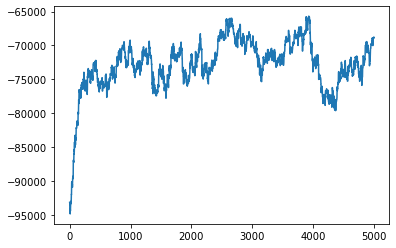

In [15]:
plt.plot(fitness_curve_arithmatic_list[21])

### Genetic Algorithm 

In [30]:
populuation_list_qa = [100, 1000, 10000]
mutation_prob_list_qa = [0.01,0.1, 0.5]

best_state_genetic_qa_list = [] 
best_fitness_genetic_qa_list = []
fitness_curve_genetic_qa_list = []

In [ ]:
for i in populuation_list_qa:
        for j in mutation_prob_list_qa:
            best_state_genetic_qa, best_fitness_genetic_qa, fitness_curve_genetic_qa = mlrose.genetic_alg(problem=optimization_object_qa,
                                                                         pop_size=i,
                                                                         mutation_prob=j,
                                                                         max_attempts=500,
                                                                         max_iters=5000,
                                                                         random_state = np.random.seed(7),
                                                                         curve=True)
            best_state_genetic_qa_list.append(best_state_genetic_qa)
            best_fitness_genetic_qa_list.append(best_fitness_genetic_qa)
            fitness_curve_genetic_qa_list.append(fitness_curve_genetic_qa)
            